### Target:
    
    - Getting the model skeleton right.

### Results:

    - Model has 292k parameters.

    - Train Accuracy = 99.89

    - Test Accuracy = 99.33

### Analysis:

    - Simple model gradually increasing channels to 128.

    - Model is still large and overfitting.

In [1]:
import torch
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [2]:
# Device
if torch.cuda.is_available():
    device = "cuda"
elif torch.backends.mps.is_available():
    device = "mps"
else:
    device = "cpu"
print("Device Selected:", device)

Device Selected: mps


In [3]:
SEED = 42
torch.manual_seed(SEED)

if device == 'cuda':
    torch.cuda.manual_seed(SEED)

In [4]:
# Train data transformations
train_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,)),
])

# Test data transformations
test_transforms = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

In [5]:
train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

In [6]:
batch_size = 64

kwargs = {'batch_size': batch_size, 'num_workers': 4, 'pin_memory': True}

train_loader = torch.utils.data.DataLoader(train_data, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(test_data, shuffle=False, **kwargs)

In [7]:
from model import Model2 as Net

model = Net()
model.summary(input_size=(batch_size, 1, 28, 28))

Layer (type:depth-idx)                   Input Shape               Output Shape              Param #                   Param %
Model2                                   [64, 1, 28, 28]           [64, 10]                  --                             --
├─Sequential: 1-1                        [64, 1, 28, 28]           [64, 32, 28, 28]          --                             --
│    └─Conv2d: 2-1                       [64, 1, 28, 28]           [64, 32, 28, 28]          288                         0.10%
│    └─ReLU: 2-2                         [64, 32, 28, 28]          [64, 32, 28, 28]          --                             --
│    └─Conv2d: 2-3                       [64, 32, 28, 28]          [64, 32, 28, 28]          9,216                       3.15%
│    └─ReLU: 2-4                         [64, 32, 28, 28]          [64, 32, 28, 28]          --                             --
├─Sequential: 1-2                        [64, 32, 28, 28]          [64, 32, 14, 14]          --                

In [8]:
from utils import train, test

In [9]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

criterion = F.nll_loss
num_epochs = 15

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train(model, device, train_loader, optimizer, criterion)
  test(model, device, test_loader, criterion)

Epoch 1


  0%|          | 0/938 [00:00<?, ?it/s]

Train: Batch Loss=0.0790 Batch_id=937 Average Loss=0.5605 Accuracy=80.61: 100%|██████████| 938/938 [00:34<00:00, 27.18it/s]


Test set: Average loss: 0.0670, Accuracy: 9778/10000 (97.78%)

Epoch 2


Train: Batch Loss=0.0104 Batch_id=937 Average Loss=0.0579 Accuracy=98.25: 100%|██████████| 938/938 [00:43<00:00, 21.50it/s]


Test set: Average loss: 0.0442, Accuracy: 9849/10000 (98.49%)

Epoch 3


Train: Batch Loss=0.0022 Batch_id=937 Average Loss=0.0401 Accuracy=98.81: 100%|██████████| 938/938 [00:43<00:00, 21.40it/s]


Test set: Average loss: 0.0344, Accuracy: 9882/10000 (98.82%)

Epoch 4


Train: Batch Loss=0.0150 Batch_id=937 Average Loss=0.0306 Accuracy=99.03: 100%|██████████| 938/938 [00:42<00:00, 22.29it/s]


Test set: Average loss: 0.0285, Accuracy: 9904/10000 (99.04%)

Epoch 5


Train: Batch Loss=0.0342 Batch_id=937 Average Loss=0.0234 Accuracy=99.25: 100%|██████████| 938/938 [00:42<00:00, 21.87it/s]


Test set: Average loss: 0.0244, Accuracy: 9919/10000 (99.19%)

Epoch 6


Train: Batch Loss=0.0172 Batch_id=937 Average Loss=0.0187 Accuracy=99.42: 100%|██████████| 938/938 [00:50<00:00, 18.63it/s]


Test set: Average loss: 0.0281, Accuracy: 9914/10000 (99.14%)

Epoch 7


Train: Batch Loss=0.0103 Batch_id=937 Average Loss=0.0157 Accuracy=99.49: 100%|██████████| 938/938 [00:34<00:00, 27.17it/s]


Test set: Average loss: 0.0240, Accuracy: 9915/10000 (99.15%)

Epoch 8


Train: Batch Loss=0.0127 Batch_id=937 Average Loss=0.0124 Accuracy=99.61: 100%|██████████| 938/938 [00:39<00:00, 23.64it/s]


Test set: Average loss: 0.0257, Accuracy: 9915/10000 (99.15%)

Epoch 9


Train: Batch Loss=0.0106 Batch_id=937 Average Loss=0.0105 Accuracy=99.70: 100%|██████████| 938/938 [00:37<00:00, 25.09it/s]


Test set: Average loss: 0.0252, Accuracy: 9933/10000 (99.33%)

Epoch 10


Train: Batch Loss=0.0003 Batch_id=937 Average Loss=0.0082 Accuracy=99.75: 100%|██████████| 938/938 [00:38<00:00, 24.13it/s]


Test set: Average loss: 0.0255, Accuracy: 9925/10000 (99.25%)

Epoch 11


Train: Batch Loss=0.0001 Batch_id=937 Average Loss=0.0076 Accuracy=99.77: 100%|██████████| 938/938 [00:37<00:00, 24.77it/s]


Test set: Average loss: 0.0237, Accuracy: 9929/10000 (99.29%)

Epoch 12


Train: Batch Loss=0.0044 Batch_id=937 Average Loss=0.0064 Accuracy=99.79: 100%|██████████| 938/938 [00:38<00:00, 24.67it/s]


Test set: Average loss: 0.0260, Accuracy: 9927/10000 (99.27%)

Epoch 13


Train: Batch Loss=0.0004 Batch_id=937 Average Loss=0.0053 Accuracy=99.83: 100%|██████████| 938/938 [00:36<00:00, 25.95it/s]


Test set: Average loss: 0.0312, Accuracy: 9926/10000 (99.26%)

Epoch 14


Train: Batch Loss=0.0000 Batch_id=937 Average Loss=0.0043 Accuracy=99.87: 100%|██████████| 938/938 [00:30<00:00, 30.74it/s]


Test set: Average loss: 0.0247, Accuracy: 9932/10000 (99.32%)

Epoch 15


Train: Batch Loss=0.0005 Batch_id=937 Average Loss=0.0033 Accuracy=99.89: 100%|██████████| 938/938 [00:37<00:00, 25.15it/s]


Test set: Average loss: 0.0268, Accuracy: 9928/10000 (99.28%)



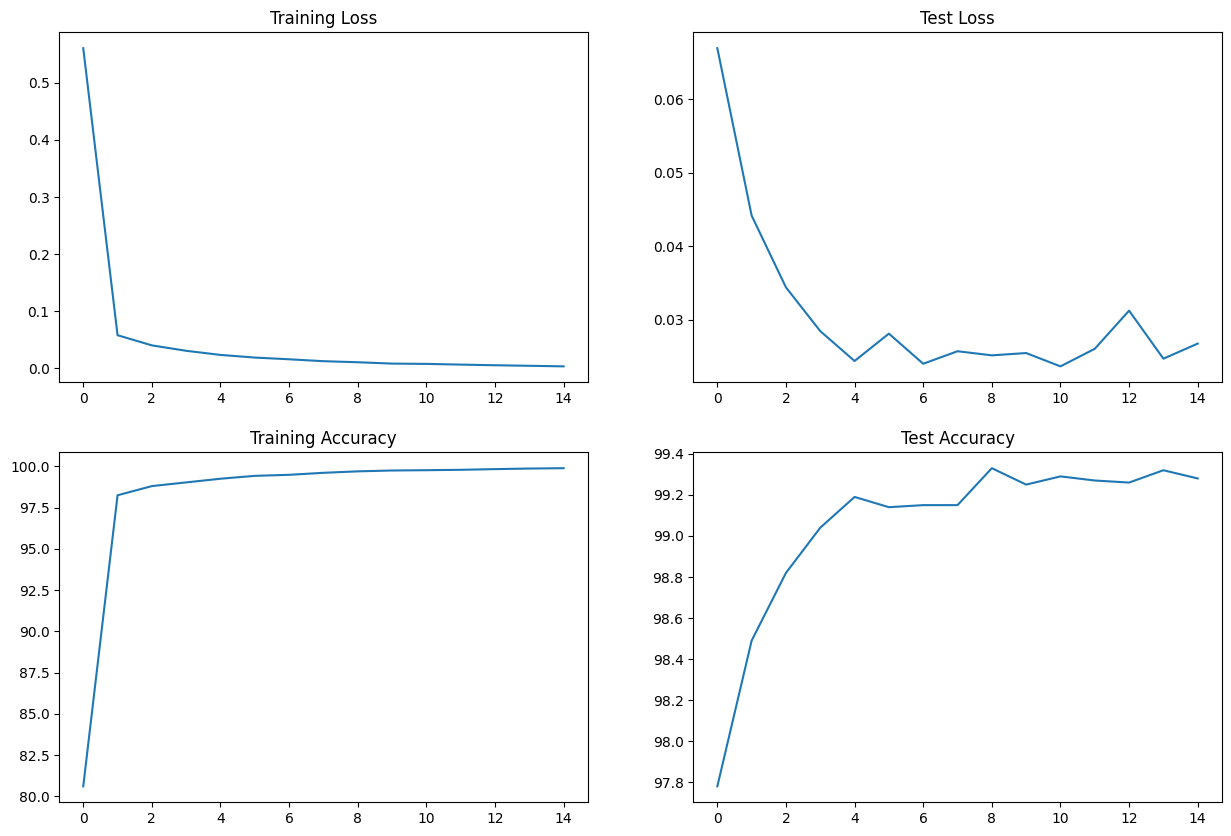

In [12]:
from utils import plot_stats
plot_stats()

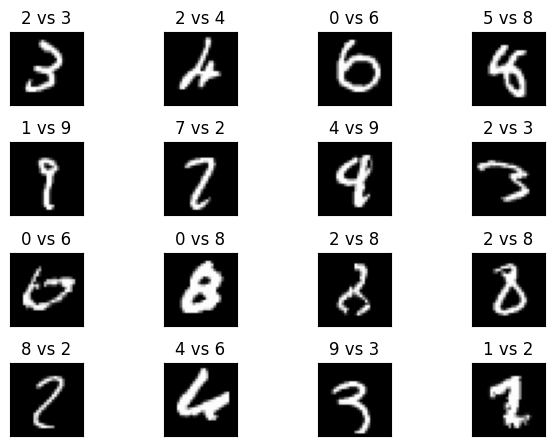

In [13]:
from utils import show_incorrect
show_incorrect() # Predicted vs Actual